## Problem Statement
An education company named X Education sells online courses to industry professionals.Company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their details, they are classified to be a lead. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, out of 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Business Goal
Build a model where we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goals of the Case Study
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## Notes on Dataset
1. leads dataset from the past with around 9000 data points.
2. Target variable is the column ‘Converted’ which tells whether a past lead was converted or not where 1 means converted and 0 means not converted.
3. Check out the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

## Steps Involved
1. Import required libraries
2. Read and Understand the data
3. Data cleaning
4. EDA
5. Data Pre-Processing (Creating Dummy Variables, Train-Test Split, Scaling, Looking at Correlation)
6. Feature Selection using RFE
7. Model Building
8. Checking P-Value and VIF
9. Plotting ROC Curve
10. Finding optimal probability cutoff
11. Model Evaluation on Test Set
12. Finding the lead scores ( 100*probability of conversion)
12. Performance Comparision for train and test scores
14. Summary

**Importing Required libraries**

In [1]:
# Importing the required libraries for the case study

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

**Reading the data**

In [2]:
#For reading the data in google drive to google colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Reading the csv file from google drive for Exploratory data analysis
lead_score=pd.read_csv('/content/drive/MyDrive/Leads.csv')
#To check top 5 rows of dataset
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**Understanding the data**

In [4]:
lead_score.shape

(9240, 37)

In [5]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

**Data cleaning**

In [8]:
# To find Percentge of missing values in all columns
100*lead_score.isnull().sum()/lead_score.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**Observation**:
- The columns "What matters most to you in choosing a course", "What is your current occupation" & "Lead Profile" are having 29% null values.
- Let's check value counts in these columns to calculate the variance and see if they are important.

**Note:**
- According to the problem statement 'select' values are equivalent to null values.
- Finding columns having 'Select' and replacing those values with NaN

In [9]:
for x in lead_score.columns:
    if(lead_score[lead_score[x]=='Select'][x].count()>1):
        print(x)

Specialization
How did you hear about X Education
Lead Profile
City


In [10]:
# Replace the 'Select' values with NaN
select_columns = ['Specialization','How did you hear about X Education', 'Lead Profile', 'City']
lead_score[select_columns] = lead_score[select_columns].apply(lambda x: x.replace('Select', np.NaN))
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# To find missing values mean percentage in all columns
100*lead_score.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
#Identifying variables which have more than 40% and more missing values
col = []
for i in lead_score.columns: 
    if (lead_score[i].isna().mean()) >= 0.40:
        col.append(i)
    else:
        pass

col

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [13]:
# Dropping the variables which are having more than 40% missing values
lead_score = lead_score.drop(columns = col, axis = 1)

In [14]:
lead_score.shape

(9240, 30)

**Note:**
- Total 7 columns are dropped which are dropped due to reason of having more than 40% missing values

**Imputing variables with less missing values**

In [15]:
lead_score.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [16]:
lead_score['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

**Observations:**
- Tags column consists of 36% null values, but on verifying this column , we can observe that it has not been filled by the user ( since categories are  Ringing, Will Revert after reading the mail etc).
- Therefore dropping the Tags column
- 'Last Activity' and 'Last Notable Activity' are columns which were added by X education team after the initial contact. 

In [17]:
## Checking the columns 'Last Activity' & 'Last Notable Activity' to verify whether they were added by X Education team
lead_score['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [18]:
lead_score['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

**Observations:**
- As per observation, we can clearly see that it is not filled by the user (e.g. 'Unreachable' , 'Had a Phone Conversation')

- For finding the positive leads with the initial data given by the user, we can ignore the columns filled by the X Education team (after contacting the user).

- Hence we can drop the 'Last Activity' & 'Last Notable Activity' columns

In [19]:
# Dropping the columns 'Last Activity', 'Last Notable Activity', 'Tags'

lead_score.drop(columns=['Last Activity','Last Notable Activity','Tags'], inplace=True)

In [20]:
lead_score.shape

(9240, 27)

In [21]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [22]:
#Checking variables which are having 15% or more missing values for imputation
col_imp = []
for i in lead_score.columns: 
    if (lead_score[i].isna().mean()) >= 0.15:
        col_imp.append(i)
    else:
        pass

col_imp

['Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']

In [23]:
# Checking value counts for country variable
lead_score.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

**Note: **
- The 'Country' variable is skewed because it was observed that there are more number of rows lies in India. We can drop 'Country' Column as it will be not useful in business Insights.

In [24]:
# Dropping the 'Country' column as it is skewed
lead_score.drop('Country', axis=1, inplace=True)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,NaN,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,NaN,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No


In [25]:
# Checking value counts for 'What is your current occupation' variable
lead_score['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

**Note:** 
- 'What is your current occupation' variable is skewed because it was observed that there are more number of rows under Unemployed category. 
- There are 29% null values in 'What is your current occupation' variable, we are imputing null values with 'Other', because Imputing with unemployed will make the variable more skewed.

In [26]:
# Imputing 'What is your current occupation' variable which is having Nan values with 'Other'.

lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(np.nan, 'Other')

In [27]:
# Checking value counts for 'What is your current occupation' column
lead_score['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# Checking value counts for 'What matters most to you in choosing a course' variable
lead_score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Note:**
- 'What matters most to you in choosing a course' variable is skewed as it was observed that it contains more number of rows under Better Career Prospects.
- The other reasons for selecting the course are very minimal. So we can drop this variable, as it will not be useful in business insights.

In [29]:
# Dropping 'What matters most to you in choosing a course' column
lead_score.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [30]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Specialization                      

In [31]:
lead_score.shape

(9240, 25)

**Checking missing values after imputation**

In [32]:
# To check missing Values
lead_score.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Specialization                              3380
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply 

**Note:**
- In Data cleaning process a total of 12 variables has been removed.

**Flag column analysis**

In [33]:
## Checking unique values in each column
lead_score.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Specialization                                18
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply 

In [34]:
## Checking the Binary columns
bin_col=[]
for x in lead_score.columns:
    if(lead_score[x].nunique()<=2):
        bin_col.append(x)
bin_col

['Do Not Email',
 'Do Not Call',
 'Converted',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [35]:
for i in bin_col:
    print(i)
    print(lead_score[i].value_counts().to_string())
    print(" ")

Do Not Email
No     8506
Yes     734
 
Do Not Call
No     9238
Yes       2
 
Converted
0    5679
1    3561
 
Search
No     9226
Yes      14
 
Magazine
No    9240
 
Newspaper Article
No     9238
Yes       2
 
X Education Forums
No     9239
Yes       1
 
Newspaper
No     9239
Yes       1
 
Digital Advertisement
No     9236
Yes       4
 
Through Recommendations
No     9233
Yes       7
 
Receive More Updates About Our Courses
No    9240
 
Update me on Supply Chain Content
No    9240
 
Get updates on DM Content
No    9240
 
I agree to pay the amount through cheque
No    9240
 
A free copy of Mastering The Interview
No     6352
Yes    2888
 


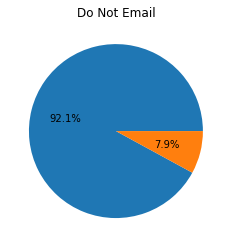

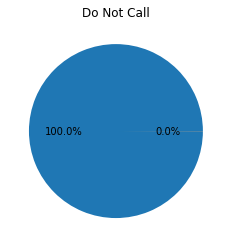

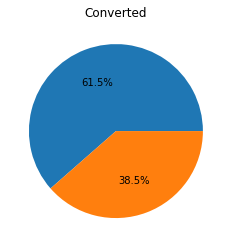

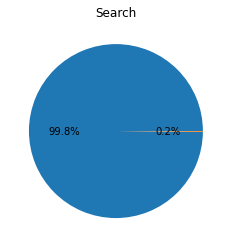

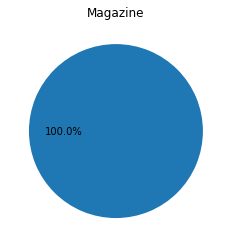

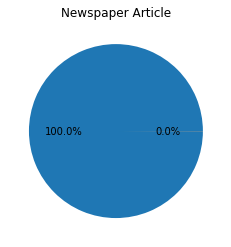

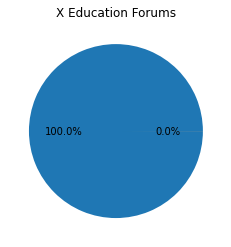

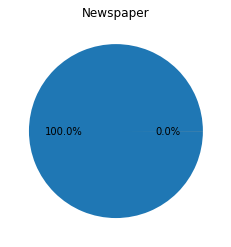

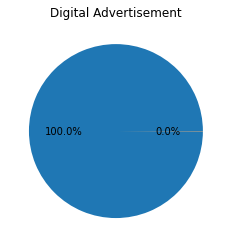

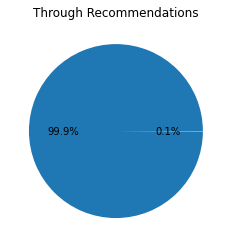

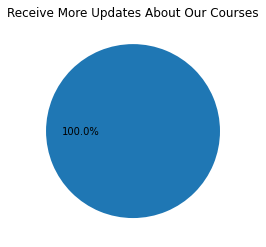

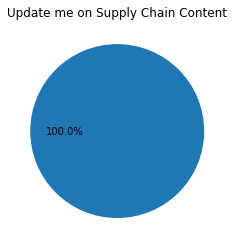

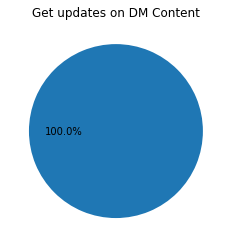

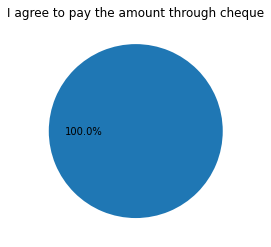

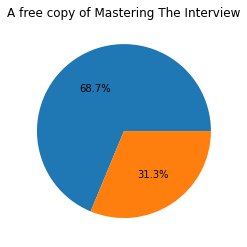

In [36]:
n=0
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct)

for i in bin_col:
    plt.title(i)
    plt.pie(lead_score[i].value_counts(),autopct=lambda pct: func(pct, lead_score[i].value_counts()))
    plt.show()

**Observation:**
- Variables 'Do Not Call','Search','Through Recommendations','Digital Advertisement','Newspaper','Newspaper Article', 'X Education Forums' are highly skewed.
- As it was observed to be containing 99% number of rows under "No" and will not be useful for business insights.  hence we are dropping all the above columns.

In [37]:
col_skew = ['Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

lead_score.drop(col_skew, axis=1, inplace=True)


In [38]:
lead_score.shape

(9240, 13)

In [39]:
lead_score['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [40]:
# Replacing google with its correct name Google
lead_score['Lead Source'].replace({'google' : 'Google'}, inplace = True)

In [41]:
lead_score['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

**Dropping unwanted columns**

**Note:** 
- 'Prospect ID' is unique identifier and it is not used for business insights, and therefore dropping this column.

In [42]:
lead_score.drop(['Prospect ID'], axis=1, inplace=True)

In [43]:
lead_score.shape

(9240, 12)

In [44]:
lead_score.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Specialization                            3380
What is your current occupation              0
City                                      3669
A free copy of Mastering The Interview       0
dtype: int64

In [45]:
#Excluding rows containing null in Total Visits as it has less than 2% null values
lead_score = lead_score[~lead_score['TotalVisits'].isna()]

In [46]:
#Excluding rows containing null in Lead Source as it has less than 1% null values
lead_score = lead_score[~lead_score['Lead Source'].isna()]

In [47]:
lead_score.isnull().mean()*100

Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Specialization                            36.169275
What is your current occupation            0.000000
City                                      39.398281
A free copy of Mastering The Interview     0.000000
dtype: float64

**Note:**
- 'City' column has almost equal to 40% null values and therefore dropping this column

In [48]:
lead_score.drop(['City'], axis=1, inplace=True)

In [49]:
# Checking value counts in 'Specialization' column
lead_score['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Travel and Tourism                   202
Media and Advertising                202
International Business               176
Healthcare Management                156
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

**Note:**
- Replacing Null values with mode might make the column look biased, therefore changing it to a new category "Unknown"

In [50]:
lead_score["Specialization"].replace(np.NaN,"Unknown", inplace=True)

In [51]:
lead_score['Specialization'].value_counts()

Unknown                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [52]:
lead_score.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
dtype: int64

In [53]:
lead_score.shape

(9074, 11)

**Note:**
- At the end of Data cleaning and imputation process total column count is 11. 

**Exploratory Data analysis (EDA)**

**Univariate analysis**

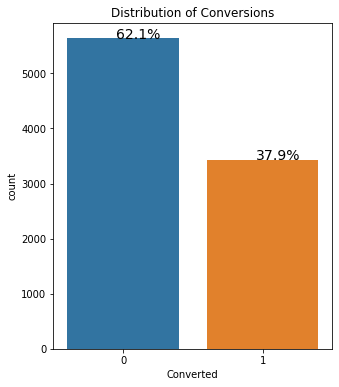

In [54]:
# Plotting the bar plot for Converted columns

plt.figure(figsize=(5,6))
ax= sns.countplot(lead_score.Converted)
plt.title('Distribution of Conversions')

# Percentage of bars

total = float(lead_score.shape[0])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
plt.show()

**Observation:**
- 38% of the leads are converted to Potential leads.

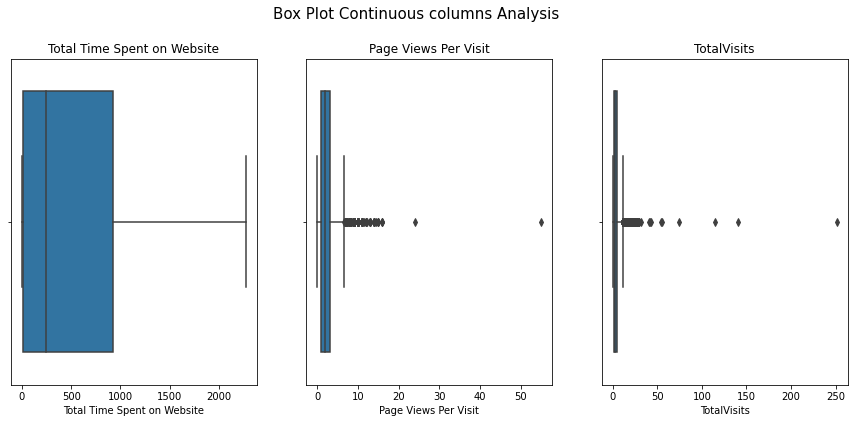

In [55]:
# Plotting the box plot for the continuous columns

fig, ax = plt.subplots(1,3,figsize=(15, 6))

fig.set_constrained_layout(True)
fig.suptitle('Box Plot Continuous columns Analysis',fontsize=15,y=1)

sns.boxplot(x='Total Time Spent on Website'
            ,data=lead_score, ax=ax[0], orient='v')
ax[0].set_title('Total Time Spent on Website')

sns.boxplot(x='Page Views Per Visit',
            data=lead_score, ax=ax[1], orient='v')
ax[1].set_title('Page Views Per Visit')

sns.boxplot(x='TotalVisits',
            data=lead_score, ax=ax[2], orient='v')
ax[2].set_title('TotalVisits')

plt.show()

**Note:**
- We dont have any outliers in 'Total Time Spent on Website' variable but we have in 'Page Views Per Visit' and 'TotalVisits'. So we need to remove the outliers using soft capping.

In [56]:
# List of numerical variables

num_lead_score = lead_score[['TotalVisits','Page Views Per Visit']]

In [57]:
# The statistical informations for the numerical variables

num_lead_score.describe(percentiles = [0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000
mean,3.456028,2.370151
std,4.858802,2.160871
min,0.000000,0.000000
5%,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.200000
90%,7.000000,5.000000
95%,10.000000,6.000000


In [58]:
# Capping the data at 95% percentile for the columns 'TotalVisits' and 'Page Views Per Visit'

total_visits = lead_score['TotalVisits'].quantile(0.95)
page_views_per_visit = lead_score['Page Views Per Visit'].quantile(0.95)

In [59]:
# Capping the TotalVisits and 'Page Views Per Visit'

lead_score['TotalVisits'][lead_score['TotalVisits']>total_visits] = total_visits
lead_score['Page Views Per Visit'][lead_score['Page Views Per Visit']>page_views_per_visit] = page_views_per_visit

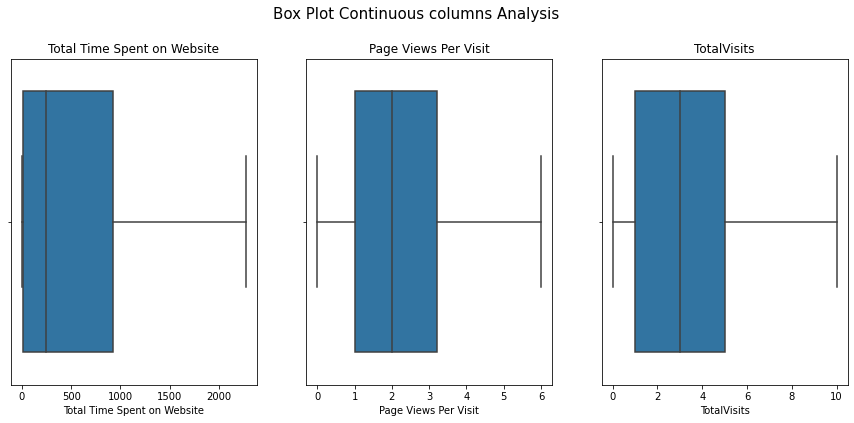

In [60]:
# Plotting the box plot for the continuous columns

fig, ax = plt.subplots(1,3,figsize=(15, 6))

fig.set_constrained_layout(True)
fig.suptitle('Box Plot Continuous columns Analysis',fontsize=15,y=1)

sns.boxplot(x='Total Time Spent on Website'
            ,data=lead_score, ax=ax[0], orient='v')
ax[0].set_title('Total Time Spent on Website')

sns.boxplot(x='Page Views Per Visit',
            data=lead_score, ax=ax[1], orient='v')
ax[1].set_title('Page Views Per Visit')

sns.boxplot(x='TotalVisits',
            data=lead_score, ax=ax[2], orient='v')
ax[2].set_title('TotalVisits')

plt.show()

**Note:** 
- No Outliers observed in above columns after soft capping

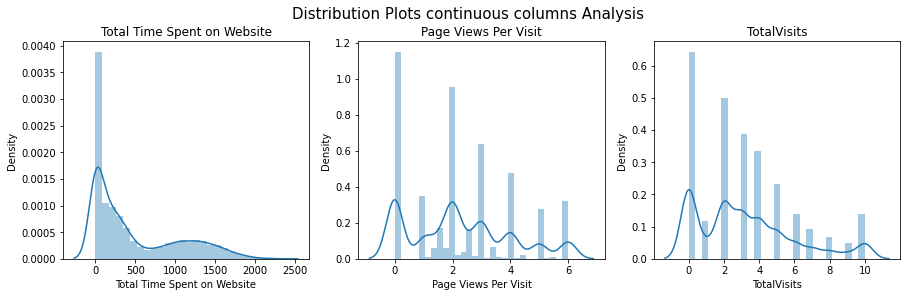

In [61]:
# Plotting the distribution plot for the continuous columns

fig, ax = plt.subplots(1,3,figsize=(15, 4))

fig.set_constrained_layout(True)
fig.suptitle('Distribution Plots continuous columns Analysis',fontsize=15,y=1)

sns.distplot(lead_score['Total Time Spent on Website'], ax=ax[0])
ax[0].set_title('Total Time Spent on Website')

sns.distplot(lead_score['Page Views Per Visit'], ax=ax[1])
ax[1].set_title('Page Views Per Visit')

sns.distplot(lead_score['TotalVisits'], ax=ax[2])
ax[2].set_title('TotalVisits')

plt.show()

**Note:** 
- Observed distribution is not normal

**Bivariate analysis**

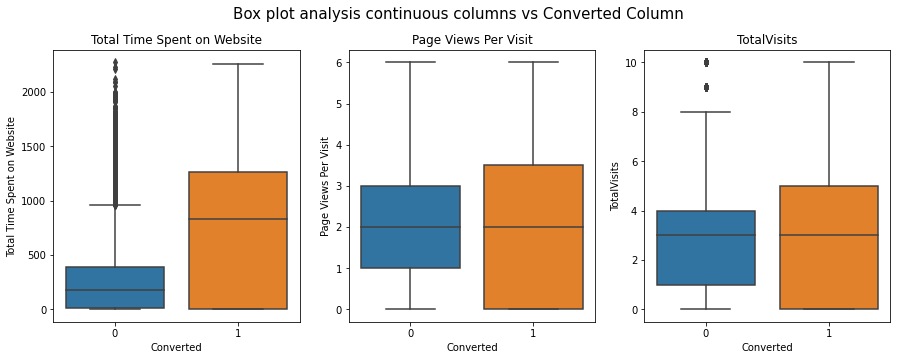

In [62]:
# Plotting the box plot for the continuous columns against Converted Column

fig, ax = plt.subplots(1,3,figsize=(15, 5))

fig.set_constrained_layout(True)
fig.suptitle('Box plot analysis continuous columns vs Converted Column',fontsize=15,y=1)

sns.boxplot(y='Total Time Spent on Website', x='Converted',
            data=lead_score, ax=ax[0], orient='v')
ax[0].set_title('Total Time Spent on Website')

sns.boxplot(y='Page Views Per Visit', x='Converted',
            data=lead_score, ax=ax[1], orient='v')
ax[1].set_title('Page Views Per Visit')

sns.boxplot(y='TotalVisits', x='Converted',
            data=lead_score, ax=ax[2], orient='v')
ax[2].set_title('TotalVisits')

plt.show()

**Observation:**
- Students who have converted to hot leads have a higher overall median value in 'Total Time Spent on Website' than students who have not converted; students who spend more time on websites are more likely to convert to hot leads.

In [63]:
# Function for plotting the bar graph of counts for categorical columns against Converted

def biv_cat(column, x, y):
    plt.figure(figsize=(x,y))
    ax=sns.countplot(lead_score[column], hue=lead_score.Converted)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_title('Counts of categories in {}'.format(column))

    # Percentage of bars
    total = float(lead_score.shape[0])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

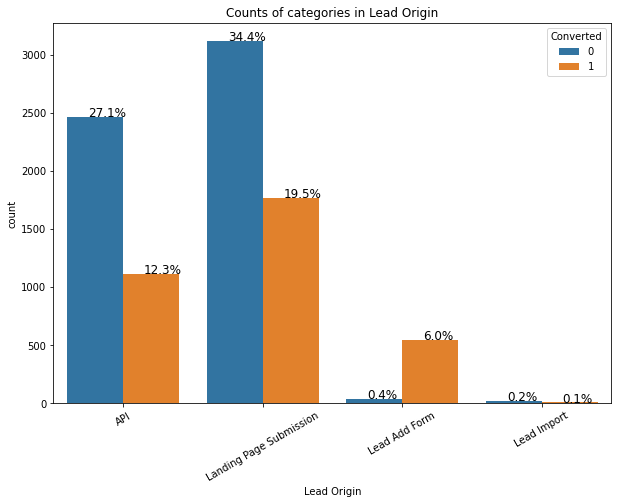

In [64]:
# For displaying counts of categories in Lead Origin
biv_cat('Lead Origin', 10,  7)

**Observations:**
- In API and Landing Page Submission leads are found higher 
- When compared to other lead sources, the Lead Add Form has a greater conversion rate. They should focus more on leads that have origin as their lead add form.

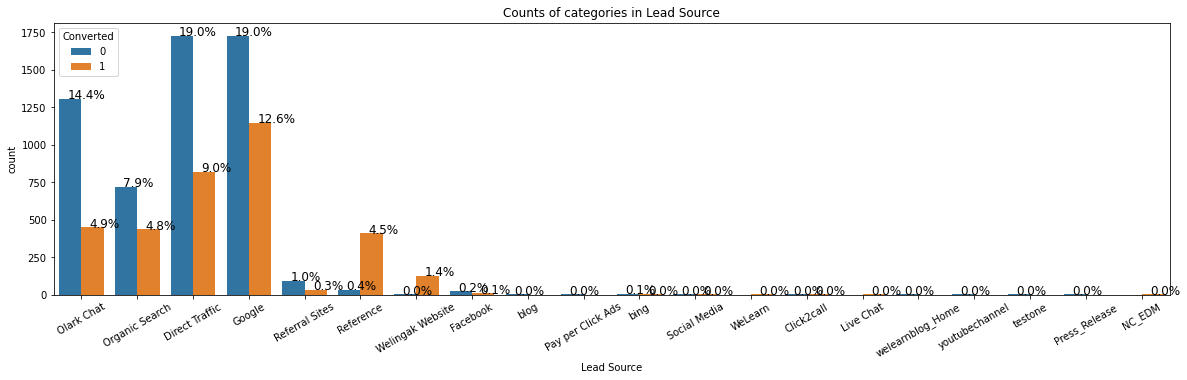

In [65]:
# Displaying counts of categories in Lead Source
biv_cat('Lead Source', 20,5)

In [66]:
# Handling the values for Lead Source based on Above Condtions
lead_source = lead_score['Lead Source'].value_counts()[lead_score['Lead Source'].value_counts()<10].index
lead_score['Lead Source'] = lead_score['Lead Source'].apply(lambda x: 'Others' if x in lead_source else x.capitalize())

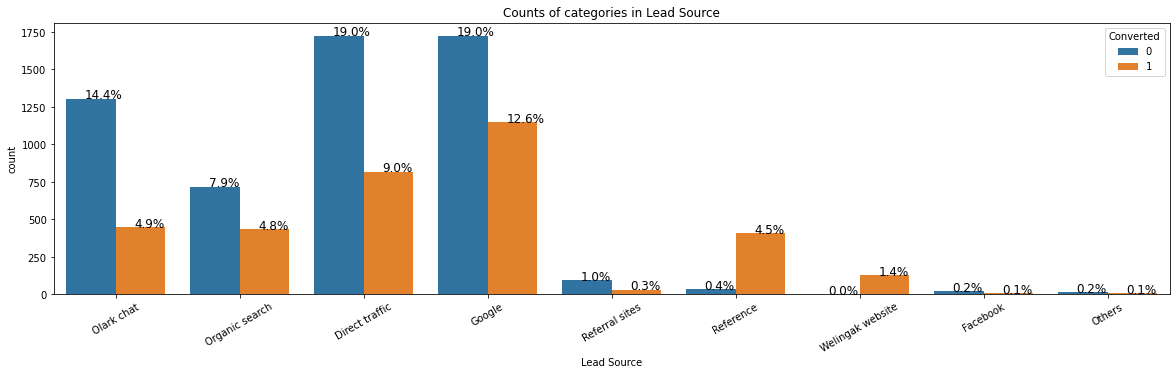

In [67]:
biv_cat('Lead Source', 20,5)

**Observations:**
-  Sources Reference and Welingak Website have a high conversion rate when compared to each other (i.e out of all the leads with same source, the conversion rate is high).

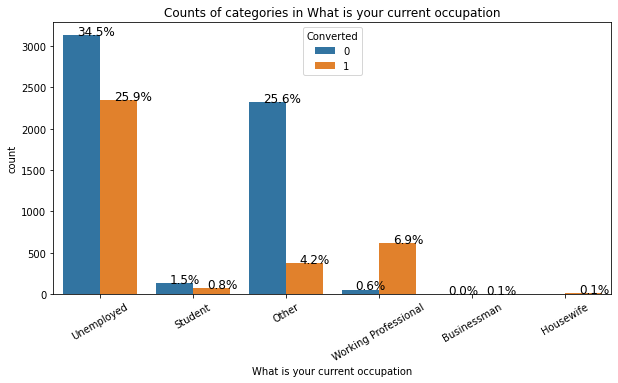

In [68]:
# Displaying counts of categories in What is your current occupation
biv_cat('What is your current occupation', 10,5)

**Obsrvations:**
- The conversion rate is very high when only working Professional are considered.
- Next highest conversion is among the unemployed category.

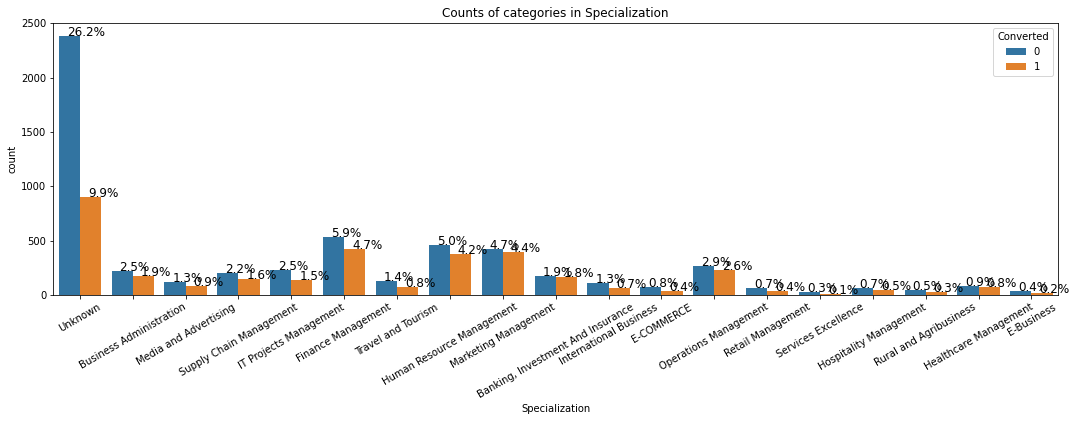

In [69]:
# Displaying counts of categories in Specialization
biv_cat('Specialization', 18,5)

**Observations:**
- Conversion and non-conversion rates are nearly identical in human resource management, E-commerce, rural & agribusiness.

**Data pre-processing**

**Converting categorical yes/no to numerical 1/0**

In [70]:
lead_score.nunique()

Lead Number                               9074
Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 11
Total Time Spent on Website               1717
Page Views Per Visit                        91
Specialization                              19
What is your current occupation              6
A free copy of Mastering The Interview       2
dtype: int64

**Observation:**
- The two binary categorical columns (yes/no) are 'Do Not Email' and 'A free copy of Mastering The Interview'.
- 'Converted' is already 1/0

In [71]:
lead_score['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [72]:
lead_score['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [73]:
# Transforming categorical variables with yes/no values to 1/0

cat_var = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

lead_score[cat_var] = lead_score[cat_var].apply(binary_map)

In [74]:
lead_score.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,660737,API,Olark chat,0,0,0.0,0,0.0,Unknown,Unemployed,0
1,660728,API,Organic search,0,0,5.0,674,2.5,Unknown,Unemployed,0
2,660727,Landing Page Submission,Direct traffic,0,1,2.0,1532,2.0,Business Administration,Student,1
3,660719,Landing Page Submission,Direct traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unknown,Unemployed,0


In [75]:
lead_score.shape

(9074, 11)

**For categorical columns creating dummy variables**

In [76]:
#For 'Lead Origin' creating Dummy variables 
Lead_Origin =pd.get_dummies(lead_score['Lead Origin'], prefix='Lead Origin',drop_first= True)
#Appending to main data frame
lead_score = pd.concat([lead_score,Lead_Origin],axis=1)

In [77]:
#For 'Lead Source' creating Dummy variables 
Lead_Source =pd.get_dummies(lead_score['Lead Source'], prefix='Lead Source',drop_first= True)
#Appending to main data frame
lead_score = pd.concat([lead_score,Lead_Source],axis=1)

In [78]:
# For 'What is your current occupation' creating Dummy variables
current_occupation =pd.get_dummies(lead_score['What is your current occupation'], prefix='Current Occupation', drop_first= True)
#Appending to main data frame
lead_score = pd.concat([lead_score,current_occupation],axis=1)

In [79]:
# For 'What is your current occupation' creating Dummy variables 
Specialization =pd.get_dummies(lead_score['Specialization'], prefix='Specialization', drop_first= True)
#Appending to main data frame
lead_score = pd.concat([lead_score,Specialization],axis=1)

In [80]:
#Dropping original columns
lead_score.drop(['Lead Origin', 'Lead Source', 'What is your current occupation', 
                  'Specialization'], axis = 1, inplace = True)

In [81]:
lead_score.shape

(9074, 41)

In [82]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9074 non-null   int64  
 1   Do Not Email                              9074 non-null   int64  
 2   Converted                                 9074 non-null   int64  
 3   TotalVisits                               9074 non-null   float64
 4   Total Time Spent on Website               9074 non-null   int64  
 5   Page Views Per Visit                      9074 non-null   float64
 6   A free copy of Mastering The Interview    9074 non-null   int64  
 7   Lead Origin_Landing Page Submission       9074 non-null   uint8  
 8   Lead Origin_Lead Add Form                 9074 non-null   uint8  
 9   Lead Origin_Lead Import                   9074 non-null   uint8  
 10  Lead Source_Facebook                

**Test-Train splitting the data**

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# feature variable to X
X = lead_score.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [85]:
# Response variable to y
y = lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [87]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
3009,0,2.0,397,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,2.0,190,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4750,0,2.0,1380,2.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7987,0,5.0,1584,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_train.shape

(6351, 39)

In [89]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [90]:
y_train.shape

(6351,)

**Scaling**

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit' ]] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [93]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
3009,0,-0.432779,-0.160255,-0.155018,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4750,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7987,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Heatmap for co-relation**

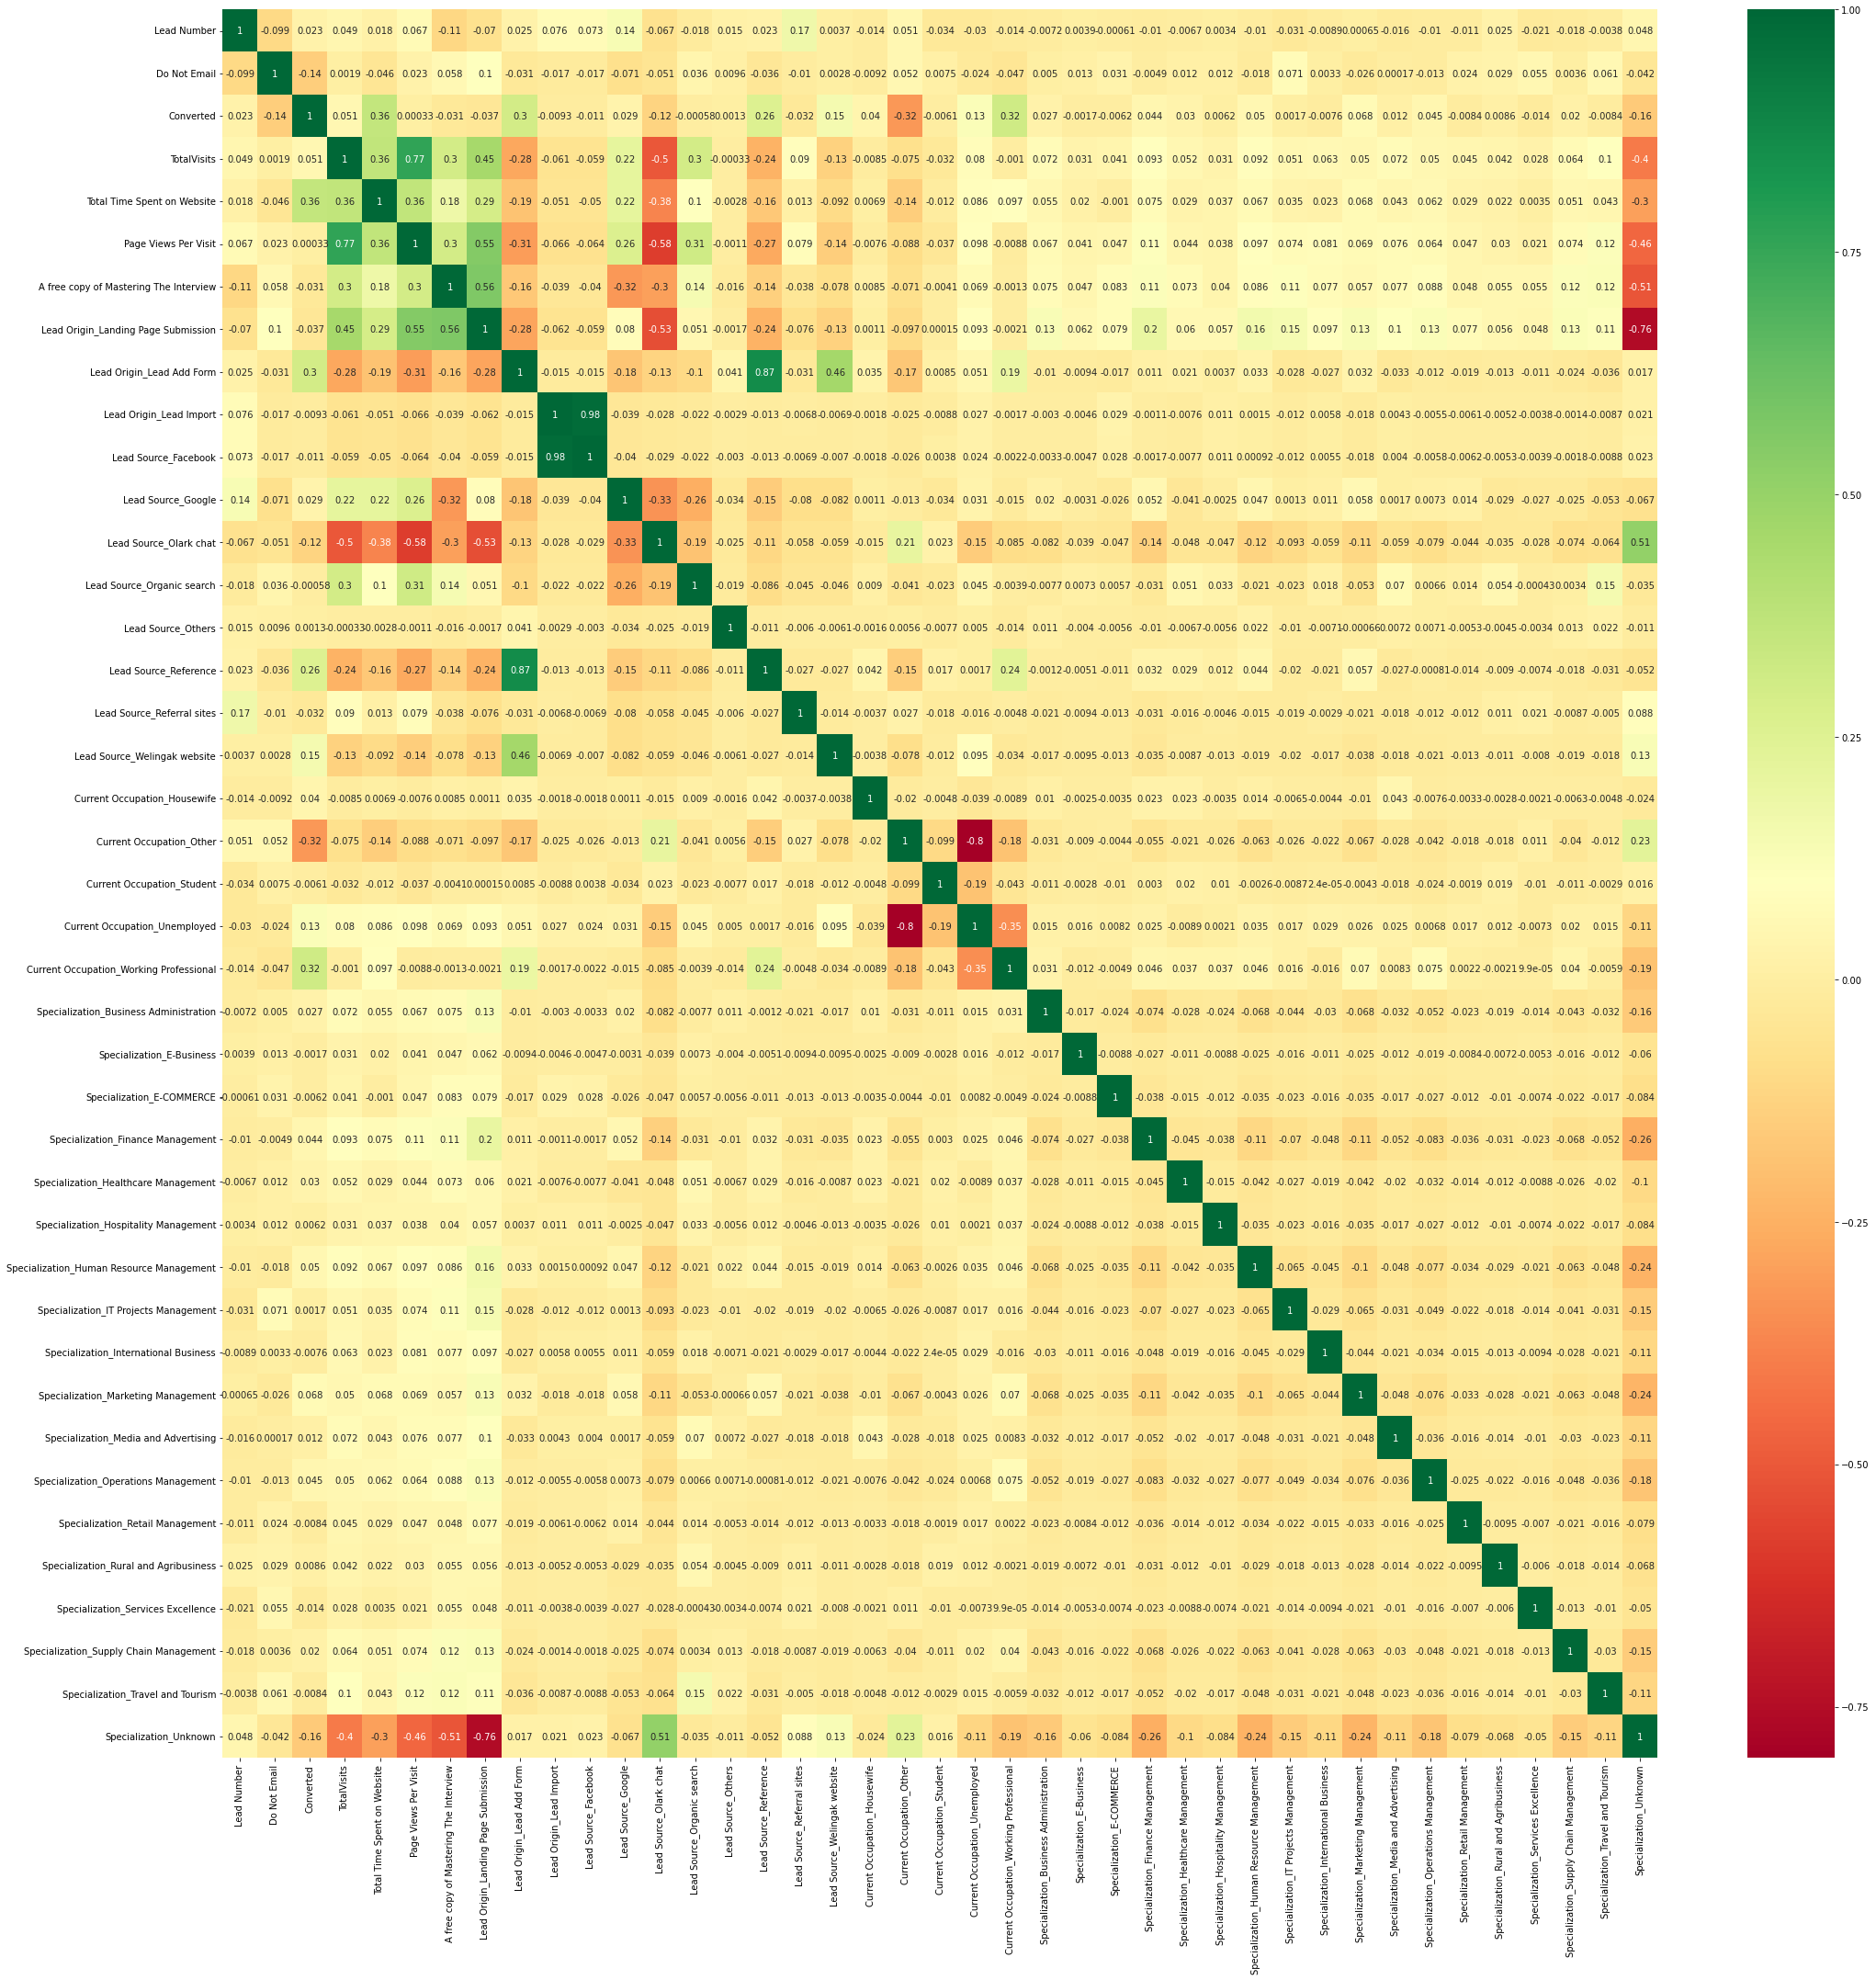

In [94]:
# Plotting the correlation matrix 
plt.figure(figsize = (35,35))        
sns.heatmap(lead_score.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

**Observation:**
- Based on the heatmap above, we discovered that the following variables have a high correlation, hence we are dropping them.

- We can observe that there are a lot of multicollinear columns in the heatmap above:
    - Pages per visit & Total Visit (0.77)
    - Lead source_Facebook & Lead Origin_Lead Import (0.98)
	- Specialization_Unknown & Lead Origin_Landing Page submission (-0.76)
    - Lead Source_Reference & Lead Origin_Lead Add Form (0.87)
    - Current Occupation_Other & Current Occupation_Unemployed (-0.8)

- We are eliminating the columns below since they have a greater correlation with other columns.
    - Page Views Per Visit
    - Lead Origin_Lead Add Form
    - Lead Source_Facebook
    - Specialization_Unknown
    - Current Occupation_Other 

- The "Time Spent on Website," "Lead Source Reference," and "Lead Origin Lead Add form" columns have a good co-relation (comparitively) with the Converted column.
- "Do not Email," "Lead Origin_API," and "Lead Source_Olark_chat" all have a negative connection with the Target column.

In [95]:
# Highly correlated dummy variables are dropped

X_train = X_train.drop(['Lead Source_Facebook','Current Occupation_Other',
                        'Lead Origin_Lead Add Form','Specialization_Unknown',
                        'Page Views Per Visit'], 1)

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              6351 non-null   int64  
 1   TotalVisits                               6351 non-null   float64
 2   Total Time Spent on Website               6351 non-null   float64
 3   A free copy of Mastering The Interview    6351 non-null   int64  
 4   Lead Origin_Landing Page Submission       6351 non-null   uint8  
 5   Lead Origin_Lead Import                   6351 non-null   uint8  
 6   Lead Source_Google                        6351 non-null   uint8  
 7   Lead Source_Olark chat                    6351 non-null   uint8  
 8   Lead Source_Organic search                6351 non-null   uint8  
 9   Lead Source_Others                        6351 non-null   uint8  
 10  Lead Source_Reference            

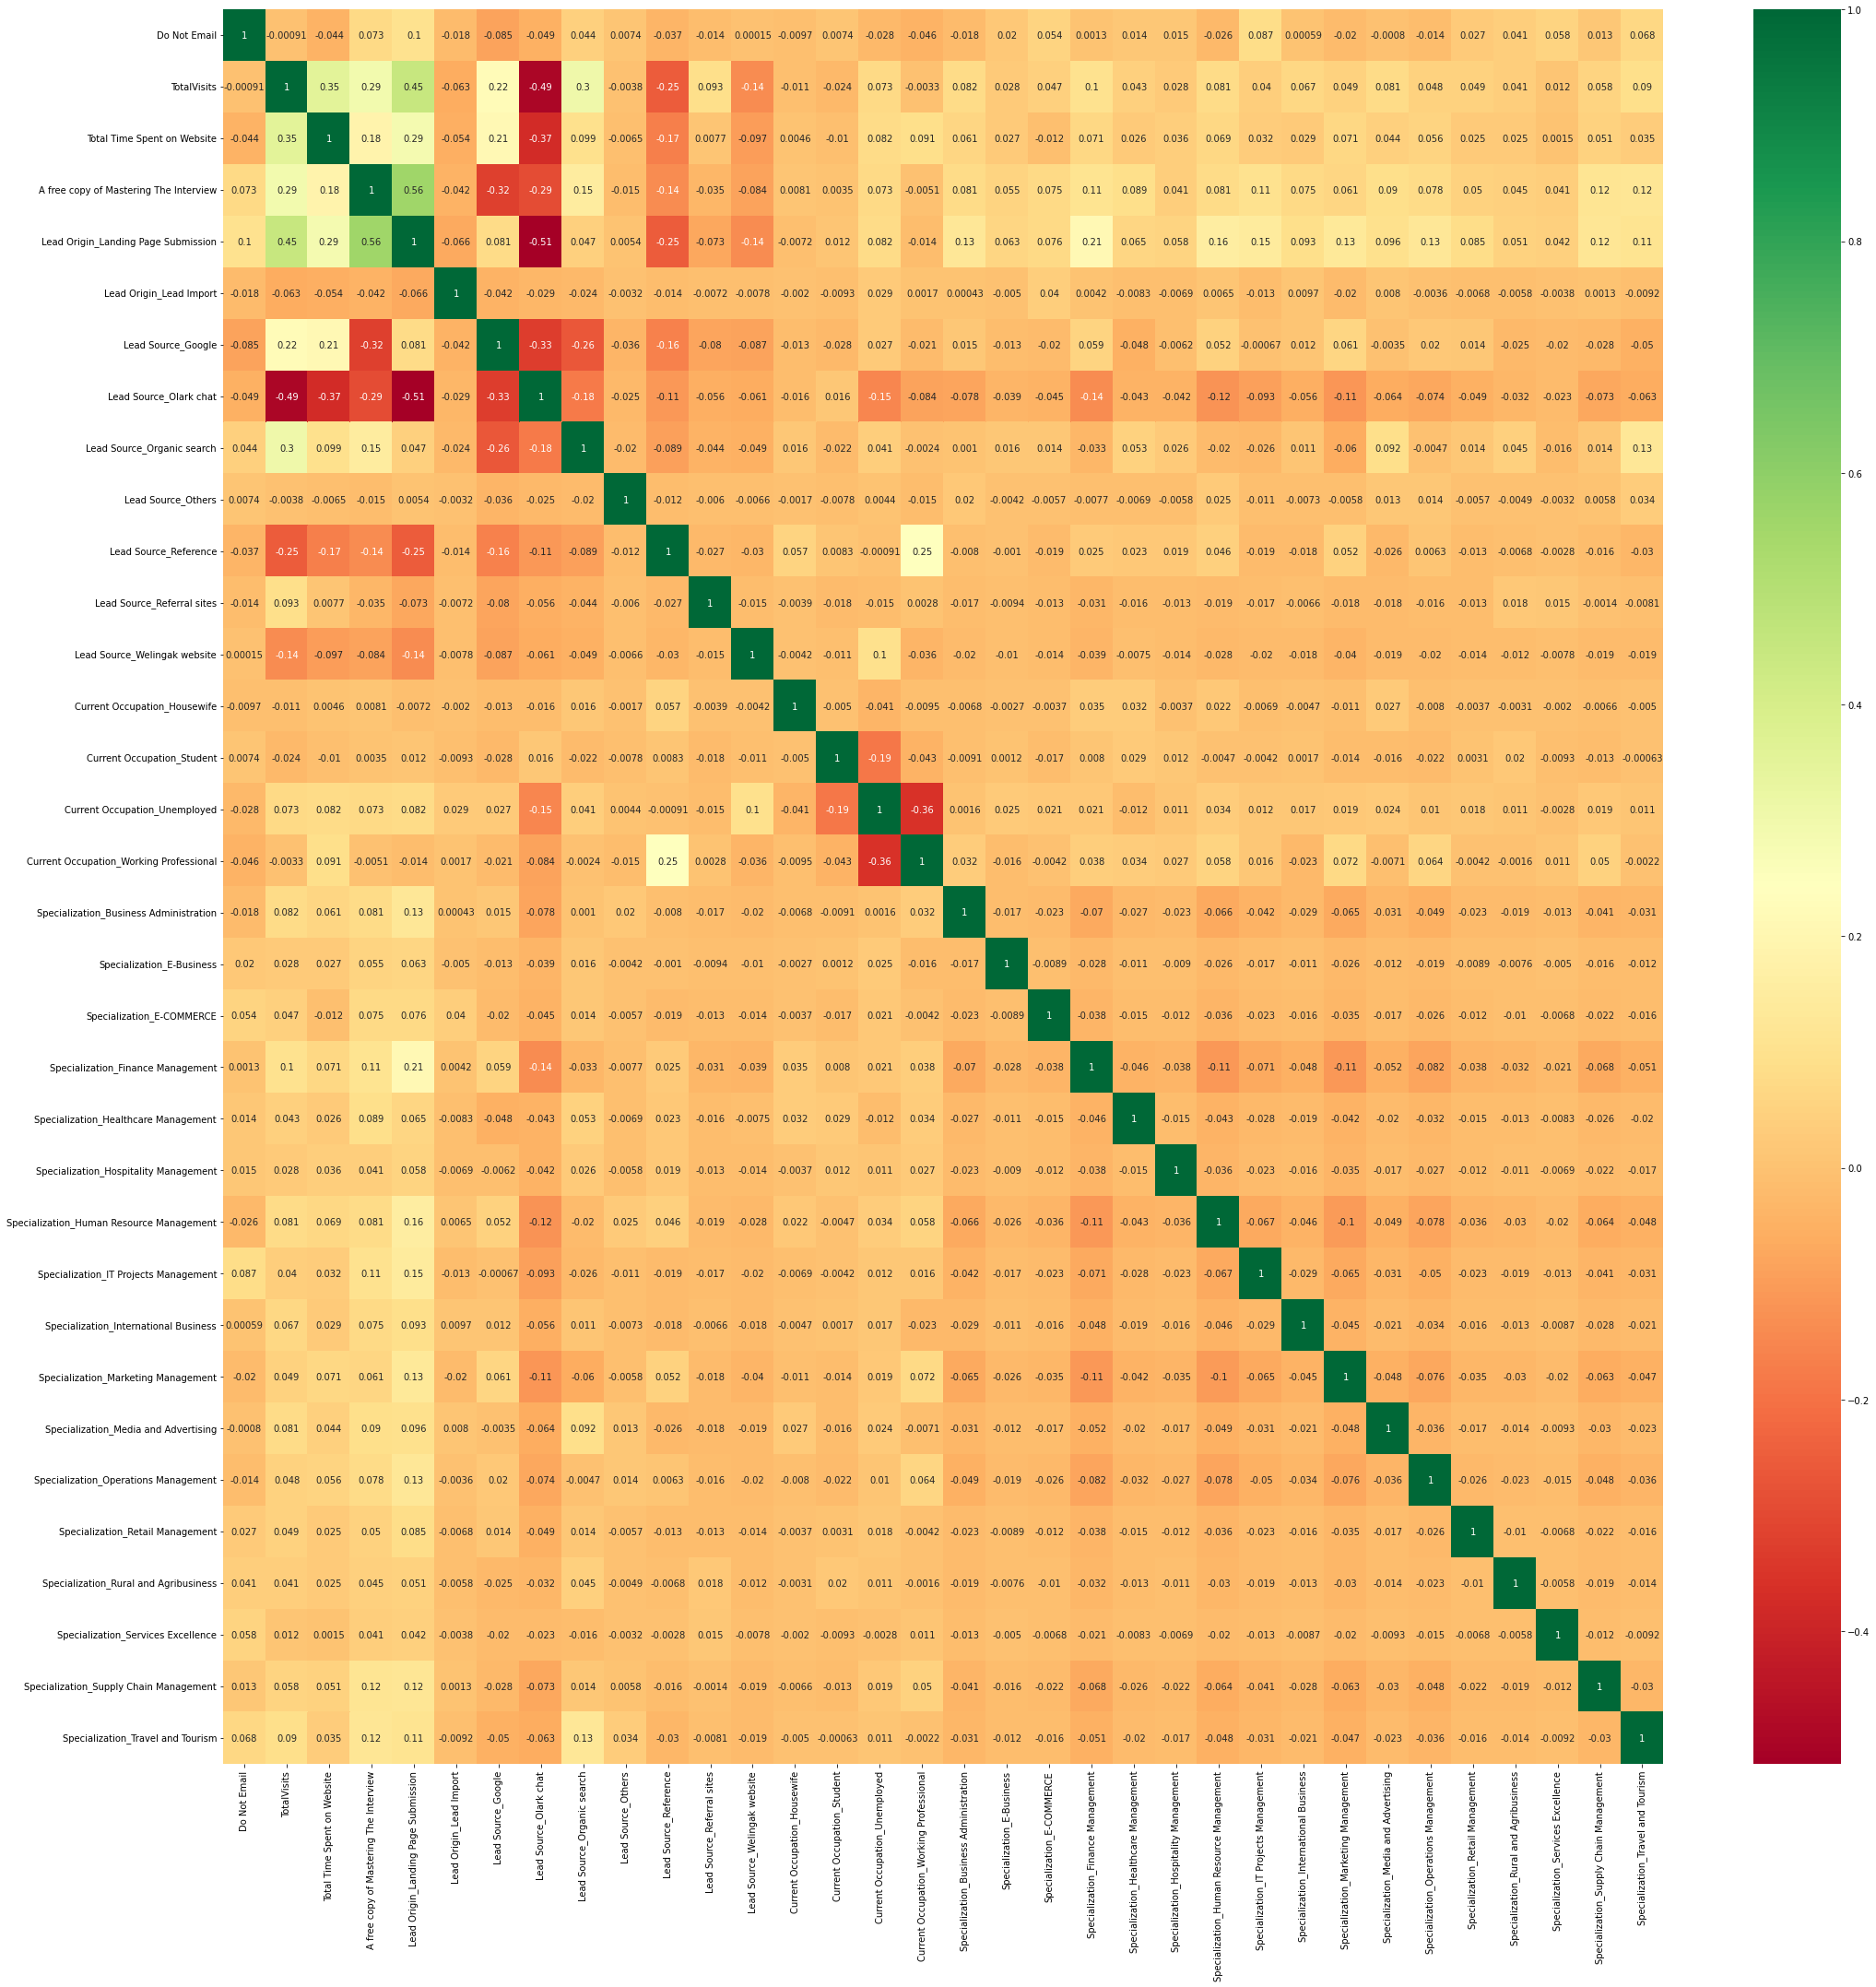

In [97]:
# Reverifying the correlation matrix after dropping highly correlated variables.
plt.figure(figsize = (35,35))
sns.heatmap(X_train.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

**Observation:**
- There are no correlation coefficients greater than 0.6, and all important correlated variables have been adjusted.


**Model-building**

In [98]:
import statsmodels.api as sm

# Running First Training Model - Logistic regression model
#logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
#logm1.fit().summary()

In [100]:
# running RFE with 15 variables as output
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
rfe = RFE(logreg, n_features_to_select = 15)             
rfe = rfe.fit(X_train, y_train)

In [104]:
rfe.support_

array([ True, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False])

In [102]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark chat', True, 1),
 ('Lead Source_Organic search', False, 20),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral sites', True, 1),
 ('Lead Source_Welingak website', True, 1),
 ('Current Occupation_Housewife', True, 1),
 ('Current Occupation_Student', True, 1),
 ('Current Occupation_Unemployed', True, 1),
 ('Current Occupation_Working Professional', True, 1),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_E-Business', False, 3),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 5),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 19

In [105]:
rfe_columns = X_train.columns[rfe.support_]

In [106]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic search', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

In [107]:
rfe_columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral sites', 'Lead Source_Welingak website',
       'Current Occupation_Housewife', 'Current Occupation_Student',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional', 'Specialization_E-COMMERCE',
       'Specialization_Healthcare Management',
       'Specialization_Marketing Management'],
      dtype='object')

**Model 1**

In [108]:
# Rebuilding the model after completing coarse tuning (RFE):
X_train_sm = sm.add_constant(X_train[rfe_columns])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.4
Date:                Sun, 10 Apr 2022   Deviance:                       5686.8
Time:                        02:40:44   Pearson chi2:                 6.37e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.1035      0.082    -25.683      0.000      -2.264      -1.943
Do Not Email                               -1.4994      0.165     -9.073      0.000      -1.823      -1.176
Total Time Spent on Website                 1.1471      0.039     29.237      0.000       1.070       1.224
Lead Origin_Lead Import                     1.1218      0.452      2.480      0.013       0.235       2.008
Lead Source_Olark chat                      1.1169      0.098     11.430      0.000       0.925       1.308
Lead Source_Others                          1.1348      0.529      2.145      0.032       0.098       2.172
Lead Source_Reference                       3.8242      0.225     16.982      0.000       3.383       4.266
Lead Source_Referral sites                 -0.4924      0.336     -1.467      0.142      -1.150       0.166
Lead Source_Welingak website                5.8586      0.723      8.107      0.000       4.442       7.275
Current Occupation_Housewife               23.6639   1.57e+04      0.002      0.999   -3.07e+04    3.07e+04
Current Occupation_Student                  1.1678      0.215      5.444      0.000       0.747       1.588
Current Occupation_Unemployed               1.3480      0.083     16.186      0.000       1.185       1.511
Current Occupation_Working Professional     3.7976      0.191     19.864      0.000       3.423       4.172
Specialization_E-COMMERCE                   0.3458      0.297      1.163      0.245      -0.237       0.929
Specialization_Healthcare Management        0.2288      0.248      0.922      0.357      -0.258       0.715
Specialization_Marketing Management         0.2820      0.114      2.470      0.014       0.058       0.506
===========================================================================================================
"""

In [109]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.092180
1012    0.395378
9226    0.341209
4750    0.515881
7987    0.826189
1281    0.573492
2880    0.042517
4971    0.806648
7536    0.915912
1248    0.798309
dtype: float64

In [110]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09218047, 0.39537799, 0.34120877, 0.51588132, 0.82618909,
       0.57349159, 0.04251737, 0.80664754, 0.91591211, 0.79830881])

**Predicted probabilities and actual converted flag**

In [111]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index
0,0,0.092180,3009
1,0,0.395378,1012
2,0,0.341209,9226
3,1,0.515881,4750
4,1,0.826189,7987


**Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0**

In [112]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index,predicted
0,0,0.092180,3009,0
1,0,0.395378,1012,0
2,0,0.341209,9226,0
3,1,0.515881,4750,1
4,1,0.826189,7987,1


In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3490  415]
 [ 868 1578]]


In [ ]:
# Predicted     not_converted    converted
# Actual
# not_converted        3490      415
# converted            868       1578

In [114]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7979845693591561


**Checking VIF**

In [115]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Current Occupation_Unemployed,1.37
1,Total Time Spent on Website,1.30
3,Lead Source_Olark chat,1.30
5,Lead Source_Reference,1.24
11,Current Occupation_Working Professional,1.18
14,Specialization_Marketing Management,1.10
0,Do Not Email,1.06
7,Lead Source_Welingak website,1.06
9,Current Occupation_Student,1.02
12,Specialization_E-COMMERCE,1.02


**Model 2**

In [116]:
# Values which has high p-value are dropped:  Current Occupation_Housewife(0.999)
rfe_columns = rfe_columns.drop(["Current Occupation_Housewife"], 1)
rfe_columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral sites', 'Lead Source_Welingak website',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional', 'Specialization_E-COMMERCE',
       'Specialization_Healthcare Management',
       'Specialization_Marketing Management'],
      dtype='object')

In [117]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[rfe_columns])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.4
Date:                Sun, 10 Apr 2022   Deviance:                       5700.8
Time:                        02:49:41   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.0827      0.081    -25.627      0.000      -2.242      -1.923
Do Not Email                               -1.5054      0.165     -9.106      0.000      -1.829      -1.181
Total Time Spent on Website                 1.1465      0.039     29.271      0.000       1.070       1.223
Lead Origin_Lead Import                     1.1205      0.452      2.478      0.013       0.234       2.007
Lead Source_Olark chat                      1.1095      0.098     11.370      0.000       0.918       1.301
Lead Source_Others                          1.1287      0.529      2.134      0.033       0.092       2.165
Lead Source_Reference                       3.8667      0.225     17.160      0.000       3.425       4.308
Lead Source_Referral sites                 -0.4965      0.335     -1.480      0.139      -1.154       0.161
Lead Source_Welingak website                5.8593      0.723      8.107      0.000       4.443       7.276
Current Occupation_Student                  1.1466      0.214      5.345      0.000       0.726       1.567
Current Occupation_Unemployed               1.3275      0.083     16.055      0.000       1.165       1.490
Current Occupation_Working Professional     3.7761      0.191     19.777      0.000       3.402       4.150
Specialization_E-COMMERCE                   0.3437      0.297      1.156      0.248      -0.239       0.926
Specialization_Healthcare Management        0.2680      0.246      1.088      0.277      -0.215       0.751
Specialization_Marketing Management         0.2780      0.114      2.435      0.015       0.054       0.502
===========================================================================================================
"""

In [118]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values

 

#Creating a dataframe with the actual Converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index

 

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index,predicted
0,0,0.093938,3009,0
1,0,0.393836,1012,0
2,0,0.339698,9226,0
3,1,0.519842,4750,1
4,1,0.826070,7987,1


In [119]:
# Checking the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.7976696583215241


In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,Current Occupation_Unemployed,1.37
1,Total Time Spent on Website,1.30
3,Lead Source_Olark chat,1.30
5,Lead Source_Reference,1.24
10,Current Occupation_Working Professional,1.18
13,Specialization_Marketing Management,1.10
0,Do Not Email,1.06
7,Lead Source_Welingak website,1.05
8,Current Occupation_Student,1.02
11,Specialization_E-COMMERCE,1.02


**Model 3**

In [121]:
# Values which has high p-value are dropped: Specialization_Healthcare Management (0.277)
rfe_columns = rfe_columns.drop(["Specialization_Healthcare Management"], 1)
rfe_columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral sites', 'Lead Source_Welingak website',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional', 'Specialization_E-COMMERCE',
       'Specialization_Marketing Management'],
      dtype='object')

In [122]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[rfe_columns])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2851.0
Date:                Sun, 10 Apr 2022   Deviance:                       5701.9
Time:                        02:59:59   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.0761      0.081    -25.632      0.000      -2.235      -1.917
Do Not Email                               -1.5003      0.165     -9.083      0.000      -1.824      -1.177
Total Time Spent on Website                 1.1468      0.039     29.277      0.000       1.070       1.224
Lead Origin_Lead Import                     1.1156      0.452      2.467      0.014       0.229       2.002
Lead Source_Olark chat                      1.1057      0.097     11.341      0.000       0.915       1.297
Lead Source_Others                          1.1228      0.529      2.123      0.034       0.086       2.159
Lead Source_Reference                       3.8698      0.225     17.181      0.000       3.428       4.311
Lead Source_Referral sites                 -0.5024      0.335     -1.498      0.134      -1.160       0.155
Lead Source_Welingak website                5.8545      0.723      8.101      0.000       4.438       7.271
Current Occupation_Student                  1.1512      0.214      5.377      0.000       0.732       1.571
Current Occupation_Unemployed               1.3264      0.083     16.047      0.000       1.164       1.488
Current Occupation_Working Professional     3.7784      0.191     19.796      0.000       3.404       4.152
Specialization_E-COMMERCE                   0.3376      0.297      1.136      0.256      -0.245       0.920
Specialization_Marketing Management         0.2719      0.114      2.385      0.017       0.048       0.495
===========================================================================================================
"""

In [123]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values

 

#Creating a dataframe with the actual Converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index

 

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index,predicted
0,0,0.094499,3009,0
1,0,0.397142,1012,0
2,0,0.340042,9226,0
3,1,0.520087,4750,1
4,1,0.826945,7987,1


In [124]:
# Checking the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.7978271138403401


In [125]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,Current Occupation_Unemployed,1.36
1,Total Time Spent on Website,1.30
3,Lead Source_Olark chat,1.30
5,Lead Source_Reference,1.24
10,Current Occupation_Working Professional,1.18
12,Specialization_Marketing Management,1.10
0,Do Not Email,1.06
7,Lead Source_Welingak website,1.05
11,Specialization_E-COMMERCE,1.02
2,Lead Origin_Lead Import,1.01


**Model 4**

In [126]:
# Values which has high p-value are dropped: Specialization_E-COMMERCE(0.256),
rfe_columns = rfe_columns.drop(["Specialization_E-COMMERCE"], 1)
rfe_columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral sites', 'Lead Source_Welingak website',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional',
       'Specialization_Marketing Management'],
      dtype='object')

In [127]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[rfe_columns])
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2851.6
Date:                Sun, 10 Apr 2022   Deviance:                       5703.2
Time:                        03:02:05   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.0708      0.081    -25.619      0.000      -2.229      -1.912
Do Not Email                               -1.4941      0.165     -9.048      0.000      -1.818      -1.170
Total Time Spent on Website                 1.1450      0.039     29.268      0.000       1.068       1.222
Lead Origin_Lead Import                     1.1395      0.451      2.525      0.012       0.255       2.024
Lead Source_Olark chat                      1.0988      0.097     11.298      0.000       0.908       1.289
Lead Source_Others                          1.1162      0.529      2.111      0.035       0.080       2.152
Lead Source_Reference                       3.8621      0.225     17.159      0.000       3.421       4.303
Lead Source_Referral sites                 -0.5078      0.335     -1.515      0.130      -1.165       0.149
Lead Source_Welingak website                5.8448      0.723      8.089      0.000       4.429       7.261
Current Occupation_Student                  1.1479      0.214      5.364      0.000       0.728       1.567
Current Occupation_Unemployed               1.3277      0.083     16.064      0.000       1.166       1.490
Current Occupation_Working Professional     3.7779      0.191     19.798      0.000       3.404       4.152
Specialization_Marketing Management         0.2667      0.114      2.342      0.019       0.043       0.490
===========================================================================================================
"""

In [128]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values

 

#Creating a dataframe with the actual Converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index

 

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index,predicted
0,0,0.094978,3009,0
1,0,0.400033,1012,0
2,0,0.340310,9226,0
3,1,0.519361,4750,1
4,1,0.827358,7987,1


In [129]:
# Checking the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.7976696583215241


In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,Current Occupation_Unemployed,1.34
1,Total Time Spent on Website,1.30
3,Lead Source_Olark chat,1.30
5,Lead Source_Reference,1.24
10,Current Occupation_Working Professional,1.17
11,Specialization_Marketing Management,1.10
0,Do Not Email,1.05
7,Lead Source_Welingak website,1.05
2,Lead Origin_Lead Import,1.01
6,Lead Source_Referral sites,1.01


**Model 5**

In [131]:
# Values which has high p-value are dropped: Lead Source_Referral sites (0.130),
rfe_columns = rfe_columns.drop(["Lead Source_Referral sites"], 1)
rfe_columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak website', 'Current Occupation_Student',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional',
       'Specialization_Marketing Management'],
      dtype='object')

In [132]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[rfe_columns])
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2852.8
Date:                Sun, 10 Apr 2022   Deviance:                       5705.6
Time:                        03:04:53   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.0805      0.081    -25.809      0.000      -2.239      -1.923
Do Not Email                               -1.4907      0.165     -9.029      0.000      -1.814      -1.167
Total Time Spent on Website                 1.1464      0.039     29.301      0.000       1.070       1.223
Lead Origin_Lead Import                     1.1491      0.451      2.546      0.011       0.265       2.034
Lead Source_Olark chat                      1.1083      0.097     11.413      0.000       0.918       1.299
Lead Source_Others                          1.1246      0.529      2.127      0.033       0.088       2.161
Lead Source_Reference                       3.8705      0.225     17.201      0.000       3.430       4.312
Lead Source_Welingak website                5.8534      0.723      8.102      0.000       4.437       7.269
Current Occupation_Student                  1.1544      0.214      5.395      0.000       0.735       1.574
Current Occupation_Unemployed               1.3291      0.083     16.088      0.000       1.167       1.491
Current Occupation_Working Professional     3.7790      0.191     19.794      0.000       3.405       4.153
Specialization_Marketing Management         0.2719      0.114      2.387      0.017       0.049       0.495
===========================================================================================================
"""

In [133]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values

 

#Creating a dataframe with the actual Converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index

 

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index,predicted
0,0,0.094127,3009,0
1,0,0.398590,1012,0
2,0,0.340297,9226,0
3,1,0.518814,4750,1
4,1,0.826572,7987,1


In [134]:
# Checking the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.7973547472838923


In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,Current Occupation_Unemployed,1.33
1,Total Time Spent on Website,1.30
3,Lead Source_Olark chat,1.30
5,Lead Source_Reference,1.23
9,Current Occupation_Working Professional,1.17
10,Specialization_Marketing Management,1.10
0,Do Not Email,1.05
6,Lead Source_Welingak website,1.05
2,Lead Origin_Lead Import,1.01
7,Current Occupation_Student,1.01


**Model 6**

In [136]:
# Lead Source_Others has slightly higher p although within range(0.033); 
# Coefficient is also less ;
# So removing and checking if it has any impact on Accuracy,
rfe_columns = rfe_columns.drop(["Lead Source_Others"], 1)
rfe_columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark chat',
       'Lead Source_Reference', 'Lead Source_Welingak website',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional',
       'Specialization_Marketing Management'],
      dtype='object')

In [137]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[rfe_columns])
logm6 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.9
Date:                Sun, 10 Apr 2022   Deviance:                       5709.8
Time:                        03:07:38   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.0718      0.080    -25.771      0.000      -2.229      -1.914
Do Not Email                               -1.4877      0.165     -9.014      0.000      -1.811      -1.164
Total Time Spent on Website                 1.1434      0.039     29.270      0.000       1.067       1.220
Lead Origin_Lead Import                     1.1405      0.451      2.528      0.011       0.256       2.025
Lead Source_Olark chat                      1.0992      0.097     11.341      0.000       0.909       1.289
Lead Source_Reference                       3.8622      0.225     17.171      0.000       3.421       4.303
Lead Source_Welingak website                5.8439      0.722      8.089      0.000       4.428       7.260
Current Occupation_Student                  1.1485      0.214      5.369      0.000       0.729       1.568
Current Occupation_Unemployed               1.3264      0.083     16.067      0.000       1.165       1.488
Current Occupation_Working Professional     3.7716      0.191     19.768      0.000       3.398       4.146
Specialization_Marketing Management         0.2691      0.114      2.363      0.018       0.046       0.492
===========================================================================================================
"""

In [138]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values

 

#Creating a dataframe with the actual Converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index

 

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index,predicted
0,0,0.094915,3009,0
1,0,0.400012,1012,0
2,0,0.340214,9226,0
3,1,0.519064,4750,1
4,1,0.826582,7987,1


In [139]:
# Checking the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.7973547472838923


In [140]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,Current Occupation_Unemployed,1.33
3,Lead Source_Olark chat,1.30
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.23
8,Current Occupation_Working Professional,1.17
9,Specialization_Marketing Management,1.10
0,Do Not Email,1.05
5,Lead Source_Welingak website,1.05
2,Lead Origin_Lead Import,1.01
6,Current Occupation_Student,1.01


- After removing the "Lead Origin_Others" accuracy remains same and P-values and VIF are also in limit. so considering this as final model

**Observation:**
- Variables now have a VIF and p-values within range
- The accuracy score that we are getting for train set for this model is 79.73%, with cutoff 0.5

**Other metrics**

In [141]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3489,  416],
       [ 871, 1575]])

In [142]:
#Predicted         not_converted    converted
#Actual
#not_converted        3489             416
#converted            871             1575

In [143]:
def metrics_cal(y):
    confusion = metrics.confusion_matrix(y.Converted, y.predicted)
    
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    TP = confusion[1,1] # true positive 

    # Sensitivity of our logistic regression model
    sensitivity = TP / float(TP+FN)  # TPR/Recall

    # Calculate specificity
    specificity = TN / float(TN+FP) # TNR

    # Calculate false postive rate - predicting converted when lead is converted to potential income source
    FPR = FP/ float(TN+FP)

    # Positive predictive value 
    Precision = TP / float(TP+FP)

    # Negative predictive value
    NPV = TN / float(TN+ FN) 

    Accuracy = metrics.accuracy_score(y.Converted, y.predicted)
    
    print("Accuracy :", Accuracy)
    print("Sensitivity / Recall :", sensitivity)
    print("Specificity :", specificity)
    print("False Postive Rate :", FPR)
    print("Negative predictive value :", NPV)
    print("Precision :", Precision)


In [144]:
# Metrics for logistic regression model
metrics_cal(y_train_pred_final)

Accuracy : 0.7973547472838923
Sensitivity / Recall : 0.6439084219133279
Specificity : 0.8934699103713188
False Postive Rate : 0.10653008962868117
Negative predictive value : 0.8002293577981652
Precision : 0.7910597689603215


**Plotting ROC**

In [145]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [146]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

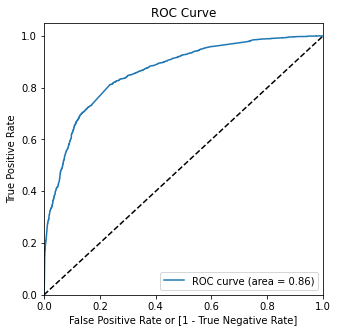

In [147]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**Observation:**
- ROC Area under curve is 0.86

**Probability cutoff**

In [148]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.094915,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.400012,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.340214,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.519064,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.826582,7987,1,1,1,1,1,1,1,1,1,1,0


In [149]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.532042     0.985282     0.248143
0.2   0.2  0.695166     0.902698     0.565173
0.3   0.3  0.769643     0.829109     0.732394
0.4   0.4  0.801134     0.702371     0.862996
0.5   0.5  0.797355     0.643908     0.893470
0.6   0.6  0.780822     0.567866     0.914213
0.7   0.7  0.762400     0.477514     0.940845
0.8   0.8  0.735002     0.363451     0.967734
0.9   0.9  0.689340     0.203189     0.993854


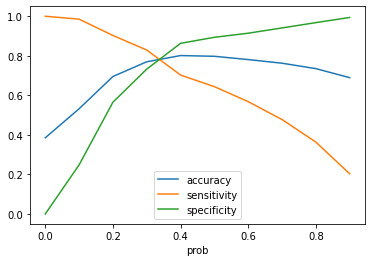

In [150]:
#Plotting the graph
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [151]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37]
for i in num:
    y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > i else 0)
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.28  0.28  0.759565     0.837694     0.710627
0.29  0.29  0.766021     0.833606     0.723688
0.30  0.30  0.769643     0.829109     0.732394
0.31  0.31  0.774839     0.821750     0.745455
0.32  0.32  0.778145     0.817253     0.753649
0.33  0.33  0.779720     0.813164     0.758771
0.34  0.34  0.782554     0.810303     0.765173
0.35  0.35  0.795623     0.726492     0.838924
0.36  0.36  0.797512     0.719951     0.846095
0.37  0.37  0.798299     0.715045     0.850448


**Observation:**
- According to the probability cutoff plot of accuracy, specificity, and sensitivity, the best cutoff is 0.34.
- According to the issue statement, the X Education team is looking for potential leads, or people who can be converted. The value of converted = 1 (TP) should be higher.
- As a result of the probability above, cutoff values of 0.34 will have a high sensitivity value.

**Model evaluation on training dataset**

In [152]:
# considering probability cutoff as 0.34
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.094915,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.400012,1012,1,1,1,1,1,1,0,0,0,0,0
2,0,0.340214,9226,1,1,1,1,1,0,0,0,0,0,0
3,1,0.519064,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.826582,7987,1,1,1,1,1,1,1,1,1,1,0


In [153]:
y_train_pred_final.drop(columns=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], inplace=True)

In [154]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Index,predicted
0,0,0.094915,3009,0
1,0,0.400012,1012,1
2,0,0.340214,9226,1
3,1,0.519064,4750,1
4,1,0.826582,7987,1


In [155]:
# Checking the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
accuracy

0.7825539285151945

In [156]:
# Metrics for logistic regression model
print("Training Dataset Metrics:")
metrics_cal(y_train_pred_final)

Training Dataset Metrics:
Accuracy : 0.7825539285151945
Sensitivity / Recall : 0.8103025347506132
Specificity : 0.7651728553137004
False Postive Rate : 0.23482714468629962
Negative predictive value : 0.86558516801854
Precision : 0.6836840289755088


**Precision and Recall**

In [157]:
#Precision
#TP / TP + FP

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6836840289755088

**Observation:**
- For this model, the final Precision score obtained after ROC and optimum cutoff for train set is 68.37 percent.

In [158]:
#Recall
#TP / TP + FN

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8103025347506132

**Observation:**
- For this model, the final Recall score obtained after ROC and optimal cutoff for train set is 81.03 percent.

In [159]:
# Tradeoff between precision and Recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

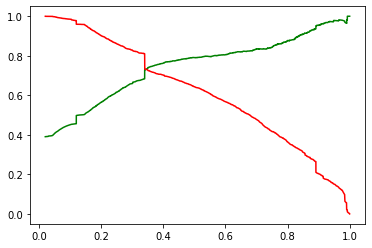

In [160]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Observation:**
- On trained data, our model predicts quite well, with a sensitivity of 81.03 percent.

**Model evaluation on test dataset**

**Scale test dataset**

In [161]:
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [162]:
X_test = X_test[rfe_columns]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark chat,Lead Source_Reference,Lead Source_Welingak website,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Specialization_Marketing Management
3271,0,-0.600595,0,0,0,0,0,0,0,0
1490,0,1.887326,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,0
4216,0,-0.888650,0,0,1,0,1,0,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0


In [163]:
# adding constant
X_test_sm = sm.add_constant(X_test)

In [164]:
# Making prediction
y_test_pred = res.predict(X_test_sm)

In [165]:
y_test_pred[:10]

3271    0.059606
1490    0.979323
7936    0.050562
4216    0.872440
3830    0.060434
1800    0.699130
6507    0.183792
4821    0.418066
4223    0.890969
4714    0.120388
dtype: float64

In [166]:
# For prediction dataset creating a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)

In [167]:
y_pred_1.head()

,0
3271,0.059606
1490,0.979323
7936,0.050562
4216,0.872440
3830,0.060434


In [168]:
# Assigning index to Target variable 'Lead Index'
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Index'] = y_test_df.index

In [169]:
# Dropping index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [170]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead Index,0
0,0,3271,0.059606
1,1,1490,0.979323
2,0,7936,0.050562
3,1,4216,0.872440
4,0,3830,0.060434


In [171]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

y_pred_final.head(10)

,Converted,Lead Index,Conversion_Prob
0,0,3271,0.059606
1,1,1490,0.979323
2,0,7936,0.050562
3,1,4216,0.872440
4,0,3830,0.060434
5,1,1800,0.699130
6,0,6507,0.183792
7,0,4821,0.418066
8,1,4223,0.890969
9,0,4714,0.120388


In [172]:
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)

y_pred_final.head()

,Converted,Lead Index,Conversion_Prob,predicted
0,0,3271,0.059606,0
1,1,1490,0.979323,1
2,0,7936,0.050562,0
3,1,4216,0.872440,1
4,0,3830,0.060434,0


In [173]:
print("Test Dataset Metrics:")
metrics_cal(y_pred_final)

Test Dataset Metrics:
Accuracy : 0.7767168564083731
Sensitivity / Recall : 0.7987866531850354
Specificity : 0.7641291810841984
False Postive Rate : 0.2358708189158016
Negative predictive value : 0.8694225721784777
Precision : 0.658882402001668


**Observation:**
- For this model, the sensitivity for the test set is 78.15 percent.

**Finding the lead scores**

In [174]:
### Lead Score = 100* probability of conversion

## Training set 

y_train_pred_final['Lead score']=y_train_pred_final['Conversion_Prob']*100

In [175]:
y_train_pred_final=y_train_pred_final.reindex(columns=['Lead Index','Converted','Conversion_Prob','predicted','Lead score'])

In [176]:
y_train_pred_final.head()

,Lead Index,Converted,Conversion_Prob,predicted,Lead score
0,3009,0,0.094915,0,9.491502
1,1012,0,0.400012,1,40.001226
2,9226,0,0.340214,1,34.021373
3,4750,1,0.519064,1,51.906351
4,7987,1,0.826582,1,82.658210


In [177]:
## Finding lead score for test data 

y_pred_final['Lead score']=y_pred_final['Conversion_Prob']*100

In [178]:
y_pred_final=y_pred_final.reindex(columns=['Lead Index','Converted','Conversion_Prob','predicted','Lead score'])

In [179]:
y_pred_final.head()

,Lead Index,Converted,Conversion_Prob,predicted,Lead score
0,3271,0,0.059606,0,5.960586
1,1490,1,0.979323,1,97.932334
2,7936,0,0.050562,0,5.056192
3,4216,1,0.872440,1,87.244033
4,3830,0,0.060434,0,6.043437


In [180]:
## Concatenating Test and Train datasets

df_lead_source=pd.concat([y_train_pred_final,y_pred_final],axis=0)

In [181]:
df_lead_source.shape

(9074, 5)

In [182]:
## Merging the Predicted and Lead Score columns with the main dataset ( lead_score )

lead_score = pd.merge(lead_score,df_lead_source[['predicted','Lead score']], how='left', 
              left_on = lead_score.index, right_on = df_lead_source['Lead Index']).drop(columns= ['key_0'])

In [183]:
lead_score.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,predicted,Lead score
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,34.021373
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,1,1,41.398818
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,78.151798
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,24.570885
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,77.457398


In [184]:
lead_score[['Lead Number','Converted','predicted','Lead score']]

,Lead Number,Converted,predicted,Lead score
0,660737,0,1,34.021373
1,660728,0,1,41.398818
2,660727,1,1,78.151798
3,660719,0,0,24.570885
4,660681,1,1,77.457398
...,...,...,...,...
9069,579564,1,1,65.053990
9070,579546,0,0,22.059695
9071,579545,0,0,5.563262
9072,579538,1,0,11.495883


In [185]:
## Accuracy on complete data set

## (total no. of records)-(number of incorrectly predicted records)/(total number of records)

(lead_score.shape[0]-sum(lead_score['Converted']!=lead_score['predicted']))/lead_score.shape[0]

0.7808022922636103

**Performance comparision for test and train dataset**

Let us compare the values obtained for Train & Test:

| | Train Data | Test Data |
| :- | -: | :-: |
| Accuracy | 78.25% | 77.67% |
| Sensitivity | 81.03% | 79.88% |
| Specificity | 76.52% | 76.41% |
| Precision | 68.37% | 65.88% |
| Recall | 81.03% | 79.88% |

**Summary**

In [186]:
# Displaying the summary of the model once again
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.9
Date:                Sun, 10 Apr 2022   Deviance:                       5709.8
Time:                        03:44:29   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Conclusion:

- Major signs that a lead will be converted into a hot lead include:

    - Website of Lead Source Welingak - A lead generated through the Welingak website is more likely to convert.
    - Lead Source Reference - A lead that has been referred by another hot lead has a higher chance of being converted.
    - Working Professional Current Occupation - A working professional lead is more likely to convert.

- Major signs that a lead will not be converted into a hot lead include:
    - Do Not Email - A lead who refuses to receive emails is less likely to be converted into a potential lead.

- The model's sensitivity score is around 81 percent, which is close to the CEO's target of 80 percent.